In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv('Reliance.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,08-11-2024,1297.65,1301.65,1275.00,1283.75,19814406,1283.75
1,07-11-2024,1324.00,1324.00,1302.60,1305.65,9611974,1305.65
2,06-11-2024,1310.00,1328.30,1300.20,1325.35,21625209,1325.35
3,05-11-2024,1293.00,1309.55,1286.15,1305.30,16267479,1305.30
4,04-11-2024,1337.85,1340.00,1285.10,1302.15,19796890,1302.15


In [195]:
df.shape

(249, 7)

In [197]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000
mean,2782.753414,2806.913855,2758.625301,2781.875703,6.654189e+06,2781.875703
std,359.953712,363.772943,356.284148,359.530617,3.768404e+06,359.530617
min,1293.000000,1301.650000,1275.000000,1283.750000,2.130200e+05,1283.750000
25%,2719.000000,2743.400000,2682.650000,2713.300000,4.157863e+06,2713.300000
50%,2913.550000,2941.000000,2889.350000,2910.050000,5.461900e+06,2910.050000
75%,2966.050000,2988.000000,2935.600000,2963.500000,8.163322e+06,2963.500000
max,3208.900000,3217.600000,3171.000000,3201.800000,2.162521e+07,3201.800000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Volume     249 non-null    int64  
 6   Adj Close  249 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


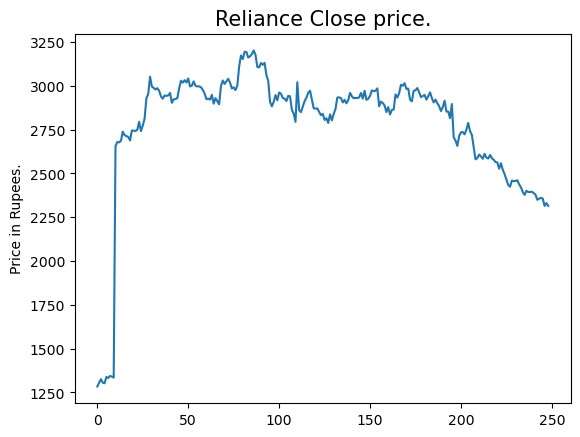

In [201]:
fig, ax = plt.subplots()
plt.plot(df['Close'])
plt.title('Reliance Close price.', fontsize=15)
plt.ylabel('Price in Rupees.')
plt.show()

In [203]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,08-11-2024,1297.65,1301.65,1275.00,1283.75,19814406,1283.75
1,07-11-2024,1324.00,1324.00,1302.60,1305.65,9611974,1305.65
2,06-11-2024,1310.00,1328.30,1300.20,1325.35,21625209,1325.35
3,05-11-2024,1293.00,1309.55,1286.15,1305.30,16267479,1305.30
4,04-11-2024,1337.85,1340.00,1285.10,1302.15,19796890,1302.15


In [205]:
df[df['Close'] == df['Adj Close']].shape

(249, 7)

In [207]:
df = df.drop(['Adj Close'], axis=1)

In [209]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

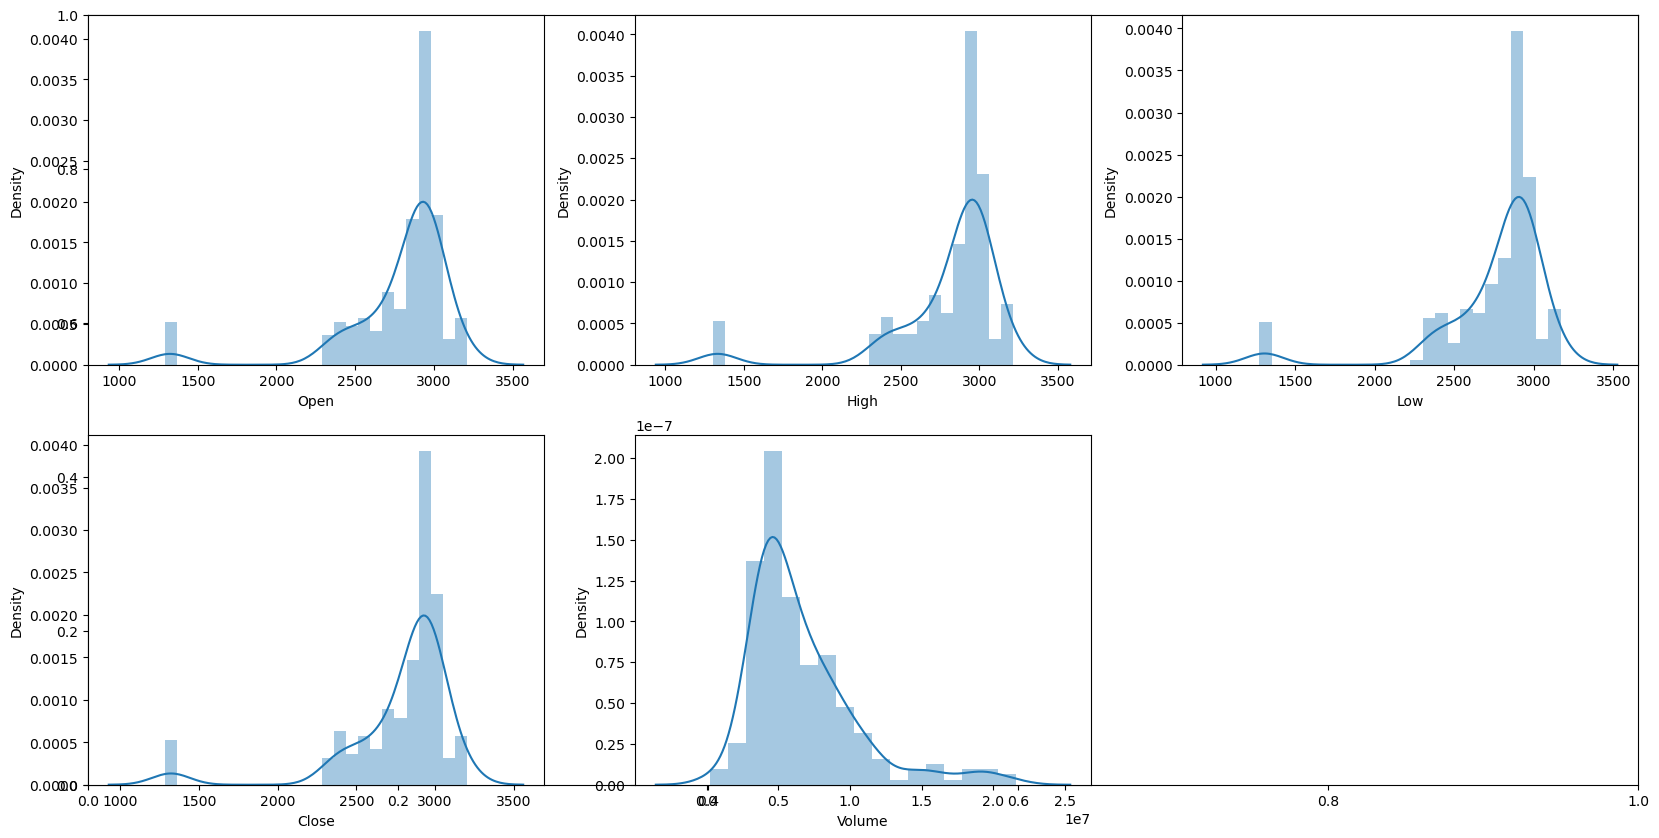

In [211]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

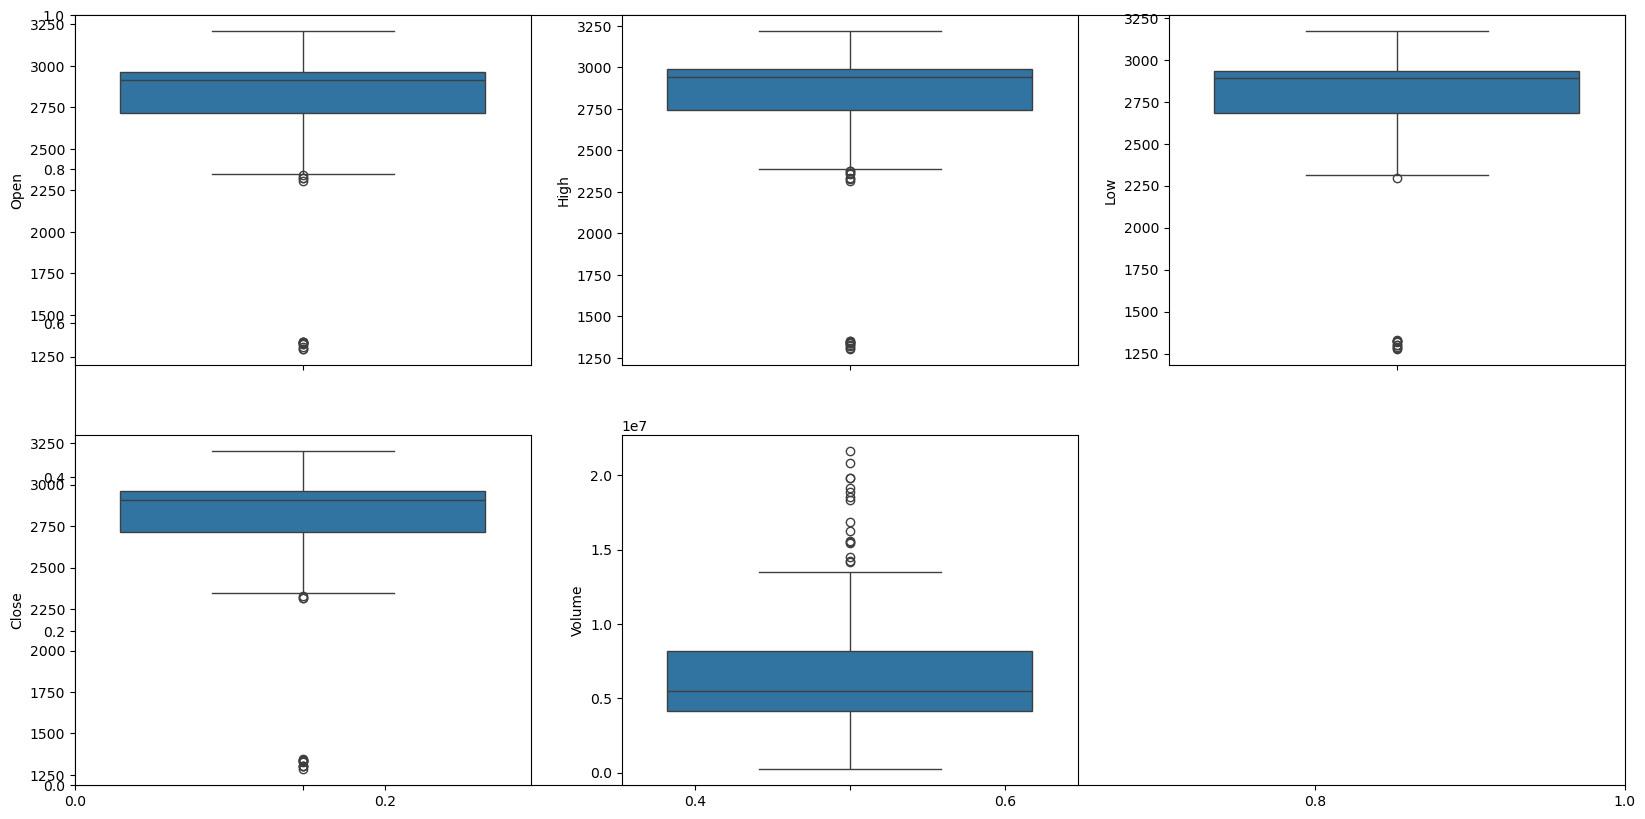

In [213]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [215]:
splitted = df['Date '].str.split('-')

df['day'] = splitted.str[1].astype('int')
df['month'] = splitted.str[0].astype('int')
df['year'] = splitted.str[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,08-11-2024,1297.65,1301.65,1275.00,1283.75,19814406,11,8,2024
1,07-11-2024,1324.00,1324.00,1302.60,1305.65,9611974,11,7,2024
2,06-11-2024,1310.00,1328.30,1300.20,1325.35,21625209,11,6,2024
3,05-11-2024,1293.00,1309.55,1286.15,1305.30,16267479,11,5,2024
4,04-11-2024,1337.85,1340.00,1285.10,1302.15,19796890,11,4,2024


In [217]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,08-11-2024,1297.65,1301.65,1275.00,1283.75,19814406,11,8,2024,0
1,07-11-2024,1324.00,1324.00,1302.60,1305.65,9611974,11,7,2024,0
2,06-11-2024,1310.00,1328.30,1300.20,1325.35,21625209,11,6,2024,1
3,05-11-2024,1293.00,1309.55,1286.15,1305.30,16267479,11,5,2024,0
4,04-11-2024,1337.85,1340.00,1285.10,1302.15,19796890,11,4,2024,0


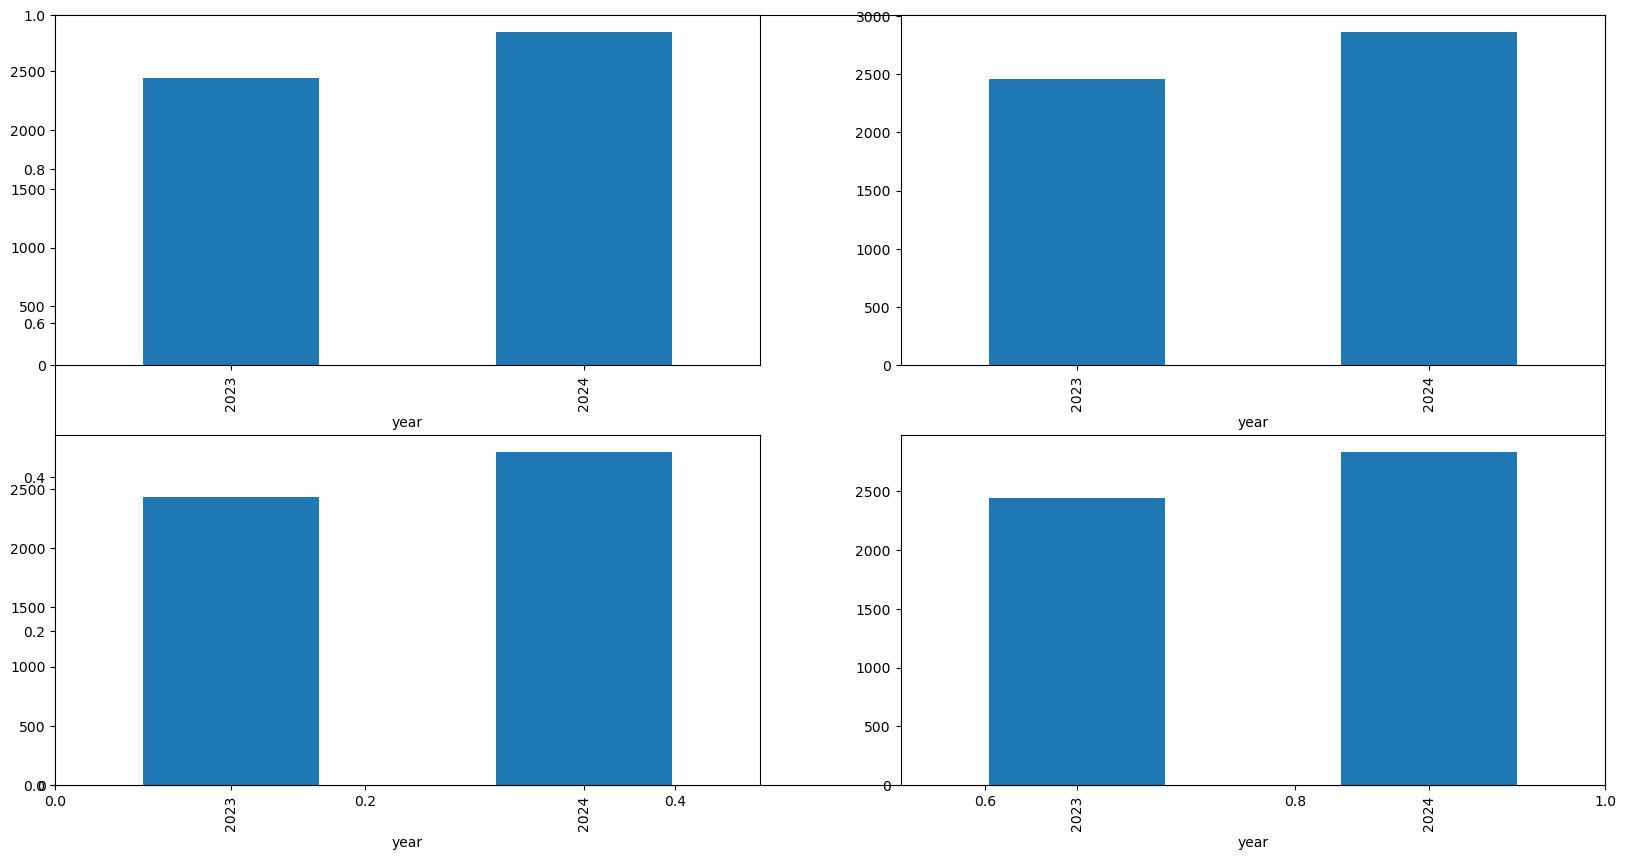

In [219]:
data_grouped = df.drop('Date ', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [221]:
df.drop('Date ', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,2767.904192,2792.835329,2744.714371,2768.726048,6.544174e+06,6.508982,15.149701,2023.862275
1,2812.995122,2835.585976,2786.956098,2808.656098,6.878246e+06,6.451220,16.426829,2023.865854


In [223]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

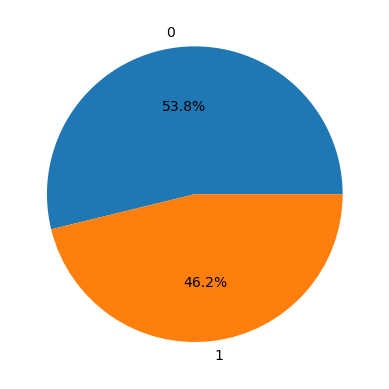

In [225]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

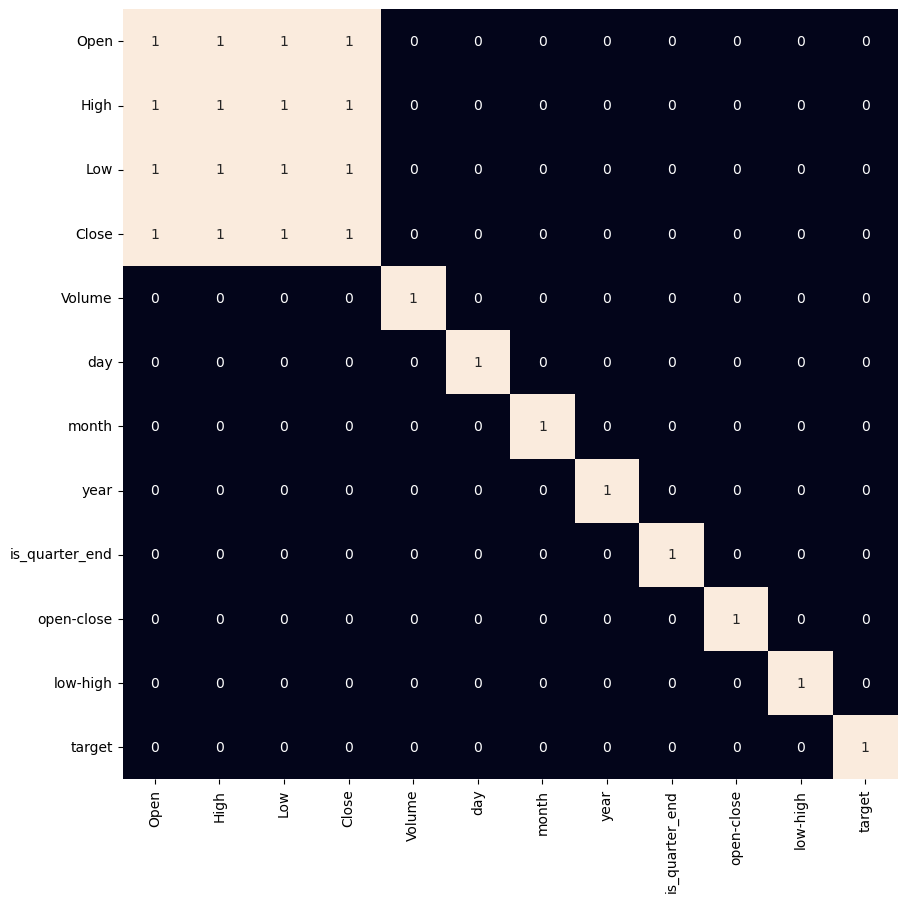

In [227]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('Date ', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [229]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(224, 3) (25, 3)


In [231]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print(model, ': ')
print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, model.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, model.predict_proba(X_valid)[:,1]))
print()

LogisticRegression() : 
Training Accuracy :  0.9596592735454837
Validation Accuracy :  0.8589743589743589



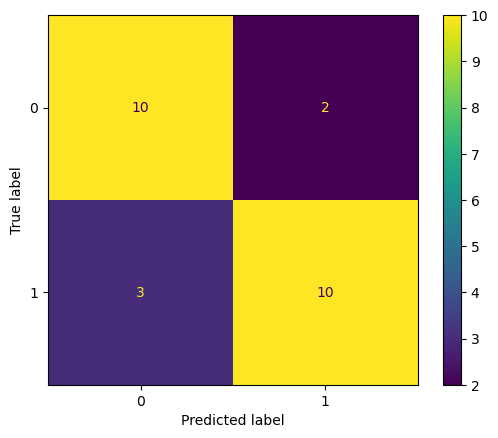

In [233]:
ConfusionMatrixDisplay.from_estimator(model, X_valid, Y_valid)
plt.show()